In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pysas import World, waveread

In [2]:
signal, samplingrate, _ = waveread("test/cmu_arctic/arctic_a0001.wav")

In [3]:
world = World(samplingrate)

In [4]:
a,b,c = world.analyze(signal)

In [5]:
len(a)

6471

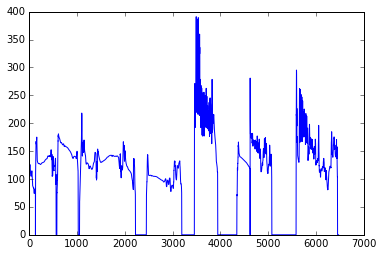

In [15]:
plt.plot(a)

In [38]:
spec = b[200]

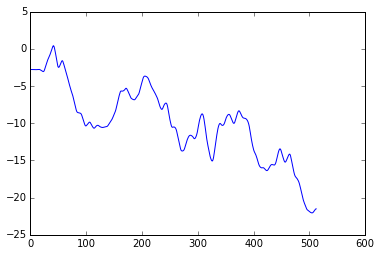

In [39]:
plt.plot(np.log(spec))

In [20]:
from pysas.mcep import to_mcep, to_spectrum

In [44]:
mcep = to_mcep(spec, 20, 0.41)

In [45]:
spec2 = to_spectrum(mcep, 0.41, world.fftsize())

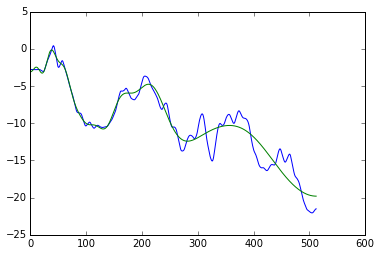

In [47]:
plt.plot(np.log(spec))
plt.plot(np.log(spec2[:world.envelopesize()]))

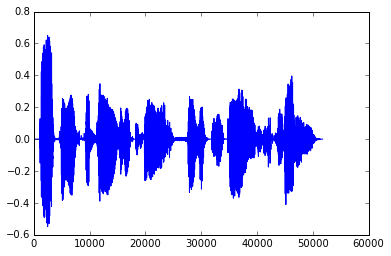

In [48]:
plt.plot(signal)

In [49]:
out = world.synthesis(a,b,c)

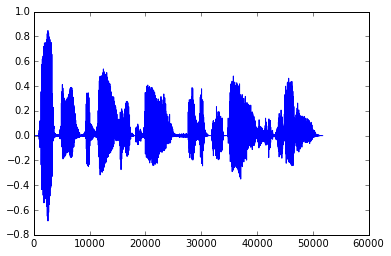

In [50]:
plt.plot(out)

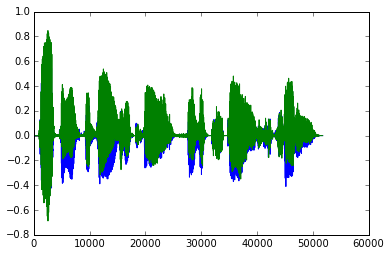

In [51]:
plt.plot(signal)
plt.plot(out)

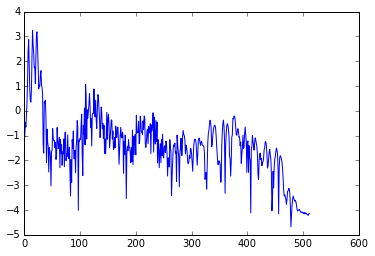

In [99]:
i = 80* 200
plt.plot(np.log(np.absolute(np.fft.fft(signal[i:i+1024]))[:1024>>1]))

In [100]:
fft_spec = np.absolute(np.fft.fft(signal[i:i+1024]))[:1024>>1]

In [101]:
fft_mcep = to_mcep(fft_spec, 20, 0.41)

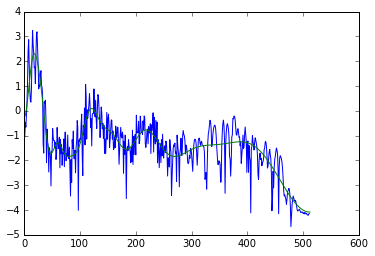

In [103]:
plt.plot(np.log(fft_spec))
plt.plot(np.log(to_spectrum(fft_mcep, 0.41, world.fftsize())))